1. Producing helpy maps

https://gist.github.com/zonca/9c114608e0903a3b8ea0bfe41c96f255

https://healpy.readthedocs.io/en/latest/tutorial.html

https://healpix.sourceforge.io/documentation.php

also in IDL

https://sourceforge.net/projects/healpix/

https://github.com/healpy/healpy/issues/556


https://mhealpy.readthedocs.io/_/downloads/en/latest/pdf/

create a map with numpy
https://python.hotexamples.com/examples/fermipy.skymap/HpxMap/create_from_fits/python-hpxmap-create_from_fits-method-examples.html?utm_content=cmp-true

with healpy
https://stackoverflow.com/questions/31573572/healpy-from-data-to-healpix-map

1.1 Python environment

using opt/miniconda3/ installation
jupyter notebook

opt/miniconda3/bin/python 2.9


### Modificata per operare in questo caso in cui confronto solo magnitudini non standardizzate

In [121]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import pathlib
import pandas
from astropy.table import Table





NSIDE and ordering

Maps are simply numpy arrays, where each array element refers to a location in the sky as defined by the Healpix pixelization schemes (see the healpix website).

Note: Running the code below in a regular Python session will not display the maps; it's recommended to use an IPython shell or a Jupyter notebook.

The resolution of the map is defined by the NSIDE parameter, which is generally a power of 2.




In [122]:
pdir = pathlib.Path('.').resolve()
ff1 = pdir / 'Y6A1_finsel_DR3_wXPSP_G17.65.fits'
df1 = Table.read(ff1).to_pandas()
#df2 = Table.read(ff2).to_pandas()
df1.columns

Index(['FGCM_ID', 'RA', 'DEC', 'FLAG', 'MAG_STD_G', 'MAG_STD_R', 'MAG_STD_I',
       'MAG_STD_Z', 'MAG_STD_Y', 'MAGERR_STD_G', 'MAGERR_STD_R',
       'MAGERR_STD_I', 'MAGERR_STD_Z', 'MAGERR_STD_Y', 'NGOOD_G', 'NGOOD_R',
       'NGOOD_I', 'NGOOD_Z', 'NGOOD_Y', 'source_id_1', 'RAdeg', 'DEdeg', 'Plx',
       'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RUWE', 'G', 'e_G', 'BP',
       'e_BP', 'RP', 'e_RP', 'bp_rp', 'NBPcont', 'NBPblend', 'NRPcont',
       'NRPblend', 'AG', 'E(BP-RP)', 'phot_bp_rp_excess_factor',
       'phot_variable_flag', 'in_qso_candidates', 'in_galaxy_candidates',
       'non_single_star', 'C_star', 'Decam_mag_g', 'Decam_mag_r',
       'Decam_mag_i', 'Decam_mag_i_corr', 'Decam_mag_z', 'Decam_mag_Y',
       'Decam_flux_g', 'Decam_flux_r', 'Decam_flux_i', 'Decam_flux_z',
       'Decam_flux_Y', 'Decam_flux_error_g', 'Decam_flux_error_r',
       'Decam_flux_error_i', 'Decam_flux_error_z', 'Decam_flux_error_Y',
       'Di_corr', 'Di_corr_2'],
      dtype='object')

/var/folders/xj/dk8brxp96wd7smjjv42dznsm0000gp/T/ipykernel_71747/2912707839.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hpxmap = np.zeros(npix, dtype=np.float) #;;;USING NUMPY
/var/folders/xj/dk8brxp96wd7smjjv42dznsm0000gp/T/ipykernel_71747/2912707839.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hpxmap2 = np.zeros(npix, d

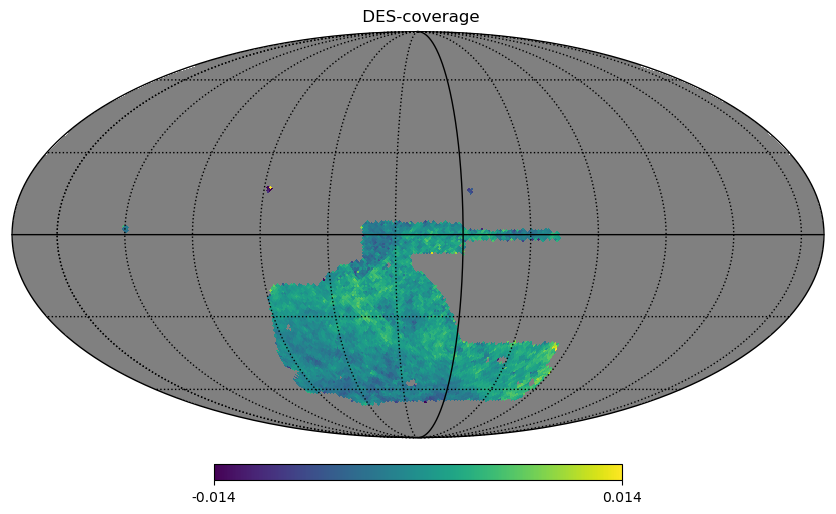

In [246]:
#https://stackoverflow.com/questions/31573572/healpy-from-data-to-healpix-map

ra_list=df1['RA'].tolist()
dec_list=df1['DEC'].tolist()
myfl=df1['Di_corr_2'].tolist()
phis = [np.deg2rad(ra) for ra in ra_list]
thetas = [np.pi / 2 - np.deg2rad(dec) for dec in dec_list]

nside = 70
# Go from HEALPix coordinates to indices
indices = hp.ang2pix(nside, thetas, phis)
# Initate the map and fill it with the values

nsources = len(myfl)
fs = myfl
npix = hp.nside2npix(nside)


hpxmap = np.zeros(npix, dtype=np.float) #;;;USING NUMPY
for i in range(nsources):
    hpxmap[indices[i]] += fs[i]

#hpxmap3 = np.zeros(npix, dtype=np.float) #;;;USING NUMPY
#for row in range(N):
#   for col in range(T):
#      dW[ x[row,col]  , :] += dout[row,col, :]

# Using numpy.add.at
# time: ~0.6 ms
hpxmap2 = np.zeros(npix, dtype=np.float) #different way still NUMPY
countmap= np.zeros(npix, dtype=np.float)
np.add.at(hpxmap2, indices, fs)   
np.add.at(countmap, indices, 1)   

hpxmap2=hpxmap2/(countmap)

#There is a function in NumPy called np.add.at which allows to add 
#values to elements accessed by multi-index with repeated elements, 
#such that for each repeated element all its corresponding values 
#will be considered in the summation. E.g. see an example:
#A = np.zeros(5)
#np.add.at(A, [1, 1, 2], 1)
#A
#
#produces:
#
#array([0., 2., 1., 0., 0.])
#


# Inspect the map
hp.mollview(hpxmap2,title = ' DES-coverage', cbar = True, rot=(200, 180, 180), cmap = 'viridis',norm=None,min=-0.014,max=0.014)
hp.graticule()
plt.show()



In [254]:
import healpy as hp
import pylab
from healpy.newvisufunc import projview, newprojplot
projview(hpxmap2, coord=["G"], 
         graticule=True, 
         graticule_labels=True,
    flip="astro", 
    unit="delta_I",
    xlabel="longitude",
    ylabel="latitude",
    cb_orientation="vertical",
         norm='symlog2',
    projection_type="mollweide")
plt.savefig('map_moll.eps',dpi=1200,bbox_inches="tight",)   
pylab.savefig('map_moll.png',bbox_inches="tight")


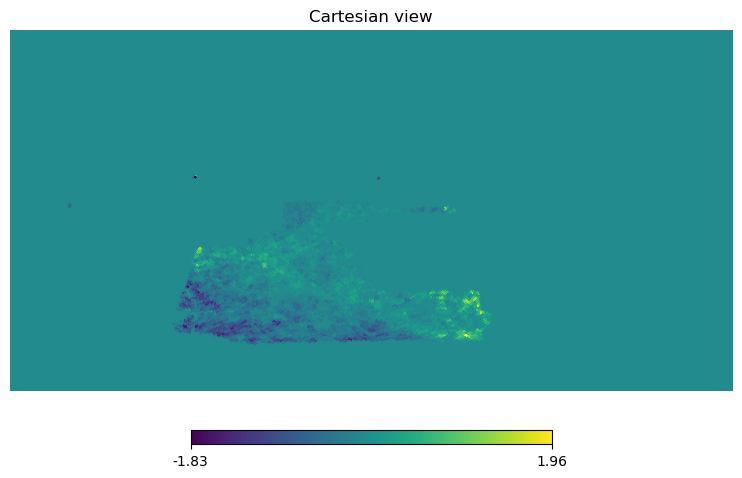

In [22]:
hp.cartview(hpxmap,fig=1,xsize=12000) #12000 pixels corresponds to ~2arcmin
plt.savefig('myFile.eps',dpi=1200)   

In [ ]:
from healpy import mollview
from pylab import arange, show, cm, Normalize
m = arange(768)
hp.mollview(hpxmap,title = ' DES-coverage', cbar = True, rot=(120, 180, 180), cmap = 'viridis')
hp.graticule()

mollview(m, cmap=cm.bwr, norm=Normalize(vmin=0, vmax=768))
show()


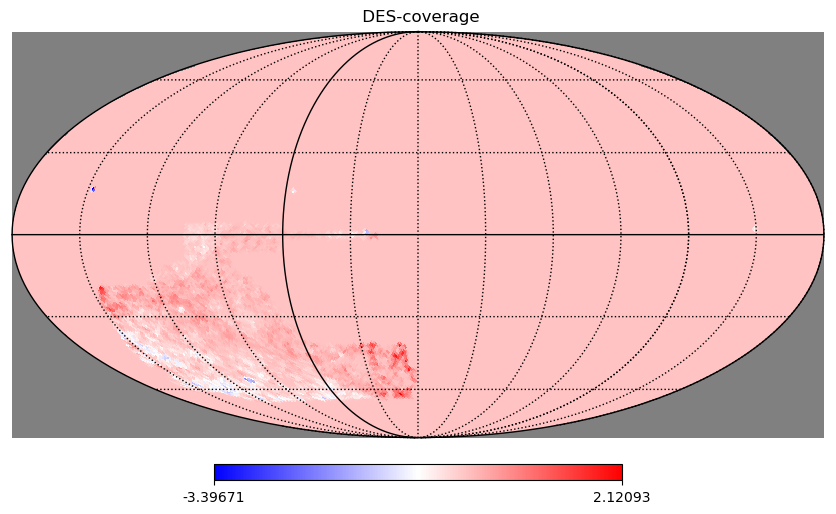

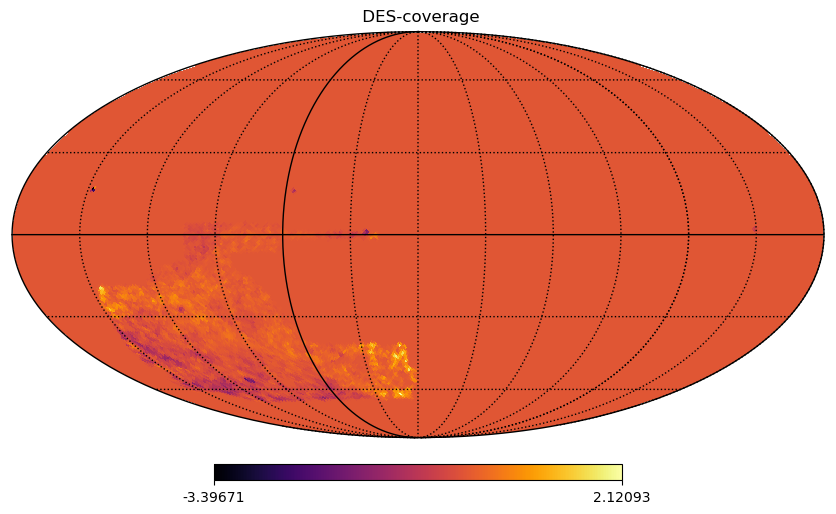

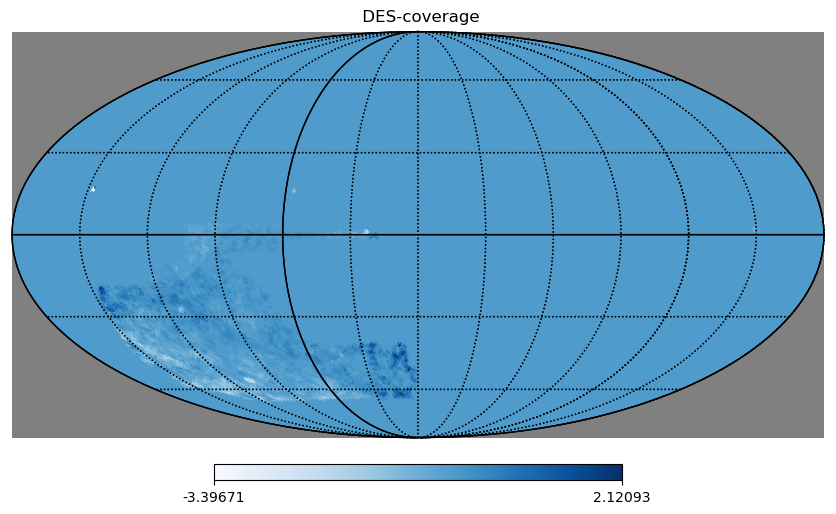

In [257]:
from healpy import mollview
from pylab import arange, show, cm, Normalize
m = arange(768)
m = arange(500)

hp.mollview(hpxmap,cmap=cm.bwr,norm=Normalize(vmin=0, vmax=768),title = ' DES-coverage', cbar = True, rot=(120, 180, 180))
hp.graticule()
plt.show()

# adjusting the colour map
cmap = cm.inferno
cmap.set_under('w')
cmap.set_bad('grey')

hp.mollview(hpxmap,cmap=cmap,title = ' DES-coverage', cbar = True, rot=(120, 180, 180))
hp.graticule()
plt.show()


cmap = cm.Blues #cm.inferno
hp.mollview(hpxmap,norm='symlog2',cmap=cmap,title = ' DES-coverage', cbar = True, rot=(120, 180, 180))
hp.graticule()

    # Plot mask
hp.visufunc.graticule()
plt.show()


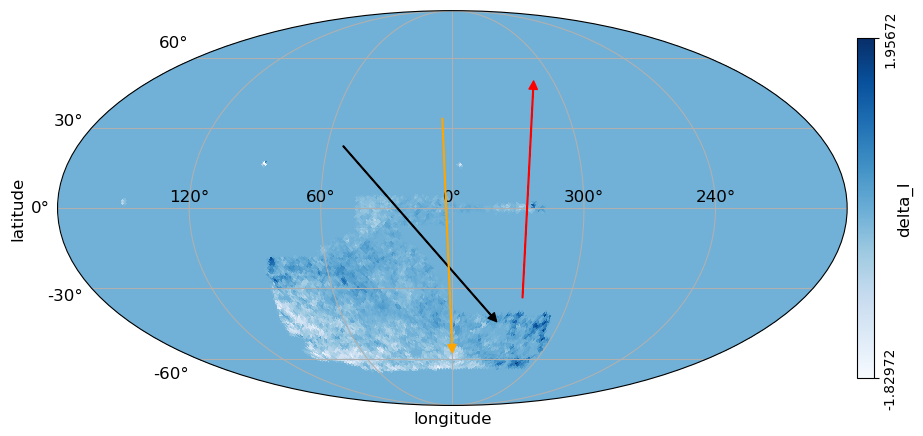

In [179]:
import healpy as hp
import pylab
from healpy.newvisufunc import projview, newprojplot
projview(hpxmap, coord=["G"], 
         graticule=True, 
         graticule_labels=True,
    flip="astro", 
    unit="delta_I",
    xlabel="longitude",
    ylabel="latitude",
    cb_orientation="vertical",
         norm='symlog2',
    projection_type="mollweide",
        cmap=cmap)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.MollweideProj()
    plt.annotate('', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))

mollweid_vec(90,30,-60,-60,'black',0.5,6,6)
mollweid_vec(10,45,120,-90,'orange',0.5,6,6)
mollweid_vec(-70,-45,30,110,'red',0.5,6,6)

plt.show()

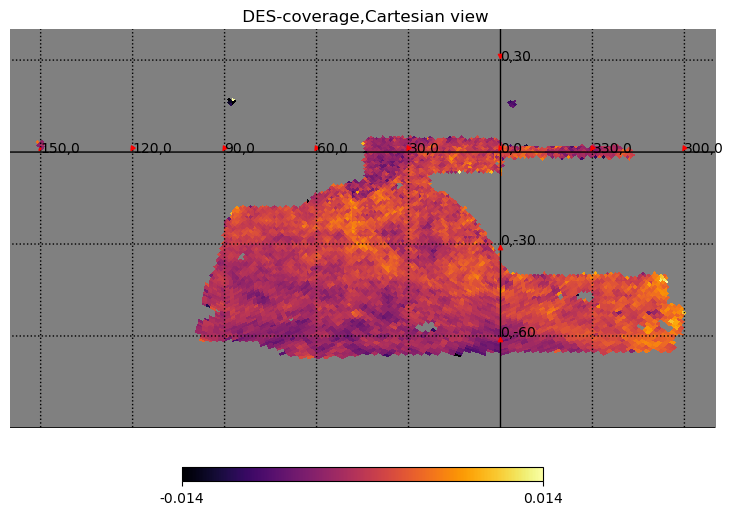

In [252]:
cmap = cm.inferno
test=hp.cartview(hpxmap2,title = ' DES-coverage,Cartesian view',cmap=cmap,
            cbar = True, 
            lonra=[-70,160],
           latra=[-90,40],
           return_projected_map=True,
           notext=True, min=-0.014,max=0.014)
#plt.imshow(test, origin='lower',extent=(-70,160,-90,40), interpolation = 'none')

hp.graticule()

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('0,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(0,0,0.5,0.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('0,30', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(0,30,0,30.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('0,-30', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(0,-30,0,-30.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('0,-60', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(0,-60,0,-60.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('0,-90', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(0,-90,0,-90.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('30,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(30,0,30.5,0.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('60,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(60,0,60.5,0.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('90,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(90,0,90.5,0.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('120,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(120,0,120.5,0.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('150,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(150,0,150.5,0.5,'red',0.2,1,1)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('300,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(300,0,300.5,0.5,'red',0.2,3,3)

def mollweid_vec(lat_start,long_start,lat_end,long_end,color,width,headwidth,headlength):
    proj = hp.projector.CartesianProj()
    plt.annotate('330,0', xy=(proj.ang2xy(lat_end, long_end,lonlat=True)), xytext=(proj.ang2xy(lat_start, long_start,lonlat=True)),   arrowprops=dict(color=color,width=width,headwidth=headwidth,headlength=headlength))
mollweid_vec(330,0,330.5,0.5,'red',0.2,3,3)


plt.show()
#plt.savefig('map_cart.eps',dpi=1200,bbox_inches="tight",)   
#pylab.savefig('map_cart.png',bbox_inches="tight")
